# Natural Language Processing

## Importing the libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [20]:
dataset = pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t',quoting=3)

In [13]:
dataset['Review'][0]

'Wow... Loved this place.'

## Cleaning the texts

In [34]:
import re
import nltk
nltk.download('stopwords') # downlowd stop words (the, that, ...)
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer #as example convert loved to love
corpus = []
for i in range(0,len(dataset)):
     #replace anything different to letter (ponstianations) by space
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) 
     ## Transform capital letter into lower 
    review = review.lower() 
    #split the review into words
    review = review.split()
    ps = PorterStemmer()
    all_stopwords= stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set (all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mtibaa_a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(corpus)

## Creating the Bag of Words model

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1560)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,-1].values

In [66]:
len(X[0])

1560

## Splitting the dataset into the Training set and Test set

In [67]:
from sklearn.model_selection import train_test_split
X_train, Xtest, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

## Training the Naive Bayes model on the Training set

In [68]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting the Test set results

In [69]:
y_pred= classifier.predict(Xtest)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

## Making the Confusion Matrix

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[55 42]
 [12 91]]


0.73

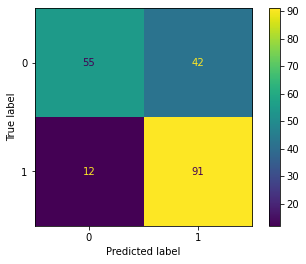

In [58]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, Xtest, y_test) 